# 4.2 Topic Modeling - Probability - Visualization

In [1]:
# format code
# pip install nb_black
%load_ext nb_black

<IPython.core.display.Javascript object>

In [2]:
import matplotlib.pyplot as plt
import numpy as np

<IPython.core.display.Javascript object>

### assume 8 topics represent the whole textcorpus - each for 1/8

### sum probability of top10 keywords per topic - to get the relative probability on how much those top10 keywords represent that topic - then aggregate same labeled topic probabilities (and stack those resulting probabilities)

In [3]:
# list of tupel (month,w1,w2,...,wn)
# corpora_topic_weights[i][0] :: Month
# corpora_topic_weights[i][1] :: Unbekannt
# corpora_topic_weights[i][2] :: Video
# corpora_topic_weights[i][3] :: Klima
# corpora_topic_weights[i][4] :: Parteien
# corpora_topic_weights[i][5] :: Politiker
# corpora_topic_weights[i][6] :: Corona
# corpora_topic_weights[i][7] :: Soziale Gerechtigkeit
# corpora_topic_weights[i][8] :: Hetze
# corpora_topic_weights[i][9] :: Hassrede
# corpora_topic_weights[i][10] :: Propaganda

topics_n = 8

corpora_topic_weights = [
    (
        "2019-05",
        0.047 * (1 / topics_n),
        0.044 * (1 / topics_n) + 0.053 * (1 / topics_n),
        0.035 * (1 / topics_n) + 0.04 * (1 / topics_n) + 0.048 * (1 / topics_n),
        0.035 * (1 / topics_n),
        0,
        0,
        0.057 * (1 / topics_n),
        0,
        0,
        0,
    ),
    (
        "2019-06",
        0.064 * (1 / topics_n)
        + 0.045 * (1 / topics_n)
        + 0.146 * (1 / topics_n)
        + 0.041 * (1 / topics_n)
        + 0.08 * (1 / topics_n)
        + 0.57 * (1 / topics_n),
        0,
        0.053 * (1 / topics_n) + 0.032 * (1 / topics_n),
        0,
        0,
        0,
        0,
        0,
        0,
        0,
    ),
    (
        "2019-07",
        0.012 * (1 / topics_n)
        + 0.012 * (1 / topics_n)
        + 0.012 * (1 / topics_n)
        + 0.01 * (1 / topics_n),
        0.023 * (1 / topics_n) + 0.014 * (1 / topics_n),
        0.013 * (1 / topics_n),
        0,
        0,
        0,
        0,
        0,
        0.012 * (1 / topics_n),
        0,
    ),
    (
        "2019-08",
        0.018 * (1 / topics_n),
        0.011 * (1 / topics_n)
        + 0.013 * (1 / topics_n)
        + 0.012 * (1 / topics_n)
        + 0.013 * (1 / topics_n)
        + 0.012 * (1 / topics_n)
        + 0.21 * (1 / topics_n),
        0.018 * (1 / topics_n),
        0,
        0,
        0,
        0,
        0,
        0,
        0,
    ),
    (
        "2019-09",
        0.011 * (1 / topics_n),
        0.011 * (1 / topics_n)
        + 0.011 * (1 / topics_n)
        + 0.011 * (1 / topics_n)
        + 0.011 * (1 / topics_n),
        0.011 * (1 / topics_n) + 0.013 * (1 / topics_n),
        0,
        0,
        0,
        0,
        0,
        0,
        0.015 * (1 / topics_n),
    ),
    (
        "2019-10",
        0.011 * (1 / topics_n) + 0.012 * (1 / topics_n),
        0.013 * (1 / topics_n)
        + 0.016 * (1 / topics_n)
        + 0.015 * (1 / topics_n)
        + 0.015 * (1 / topics_n)
        + 0.016 * (1 / topics_n)
        + 0.011 * (1 / topics_n),
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
    ),
    (
        "2019-11",
        0.011 * (1 / topics_n),
        0.013 * (1 / topics_n) + 0.013 * (1 / topics_n) + 0.01 * (1 / topics_n),
        0.01 * (1 / topics_n) + 0.01 * (1 / topics_n),
        0.01 * (1 / topics_n) + 0.013 * (1 / topics_n),
        0,
        0,
        0,
        0,
        0,
        0,
    ),
    (
        "2019-12",
        0,
        0.013 * (1 / topics_n) + 0.01 * (1 / topics_n),
        0.014 * (1 / topics_n) + 0.019 * (1 / topics_n) + 0.013 * (1 / topics_n),
        0,
        0,
        0,
        0,
        0,
        0.014 * (1 / topics_n),
        0.014 * (1 / topics_n) + 0.014 * (1 / topics_n),
    ),
    (
        "2020-01",
        0.013 * (1 / topics_n) + 0.016 * (1 / topics_n),
        0.018 * (1 / topics_n),
        0.016 * (1 / topics_n),
        0,
        0,
        0,
        0,
        0,
        0.03 * (1 / topics_n),
        0.018 * (1 / topics_n) + 0.019 * (1 / topics_n) + 0.019 * (1 / topics_n),
    ),
    (
        "2020-02",
        0.012 * (1 / topics_n),
        0.013 * (1 / topics_n) + 0.012 * (1 / topics_n) + 0.012 * (1 / topics_n),
        0.012 * (1 / topics_n) + 0.014 * (1 / topics_n),
        0.014 * (1 / topics_n),
        0,
        0,
        0,
        0.012 * (1 / topics_n),
        0,
        0,
    ),
    (
        "2020-03",
        0.018 * (1 / topics_n),
        0.017 * (1 / topics_n)
        + 0.23 * (1 / topics_n)
        + 0.018 * (1 / topics_n)
        + 0.021 * (1 / topics_n),
        0.013 * (1 / topics_n) + 0.019 * (1 / topics_n),
        0,
        0,
        0.022 * (1 / topics_n),
        0,
        0,
        0,
        0,
    ),
    (
        "2020-04",
        0.016 * (1 / topics_n) + 0.03 * (1 / topics_n),
        0.038 * (1 / topics_n) + 0.02 * (1 / topics_n) + 0.014 * (1 / topics_n),
        0.024 * (1 / topics_n),
        0.014 * (1 / topics_n),
        0,
        0,
        0,
        0,
        0.033 * (1 / topics_n),
        0,
    ),
    (
        "2020-05",
        0.08 * (1 / topics_n) + 0.021 * (1 / topics_n),
        0.022 * (1 / topics_n)
        + 0.02 * (1 / topics_n)
        + 0.017 * (1 / topics_n)
        + 0.016 * (1 / topics_n),
        0,
        0.012 * (1 / topics_n),
        0,
        0,
        0,
        0,
        0.023 * (1 / topics_n),
        0,
    ),
    (
        "2020-06",
        0.011 * (1 / topics_n),
        0.013 * (1 / topics_n)
        + 0.022 * (1 / topics_n)
        + 0.012 * (1 / topics_n)
        + 0.018 * (1 / topics_n),
        0,
        0.014 * (1 / topics_n) + 0.014 * (1 / topics_n),
        0,
        0,
        0,
        0.016 * (1 / topics_n),
        0,
        0,
    ),
    (
        "2020-07",
        0.013 * (1 / topics_n) + 0.015 * (1 / topics_n),
        0.093 * (1 / topics_n),
        0.02 * (1 / topics_n),
        0.017 * (1 / topics_n),
        0,
        0,
        0,
        0,
        0.03 * (1 / topics_n),
        0.031 * (1 / topics_n) + 0.025 * (1 / topics_n),
    ),
    (
        "2020-08",
        0.022 * (1 / topics_n) + 0.023 * (1 / topics_n) + 0.027 * (1 / topics_n),
        0.016 * (1 / topics_n) + 0.02 * (1 / topics_n),
        0,
        0,
        0,
        0,
        0.013 * (1 / topics_n),
        0,
        0.029 * (1 / topics_n) + 0.032 * (1 / topics_n),
        0,
    ),
    (
        "2020-09",
        0.036 * (1 / topics_n),
        0,
        0,
        0,
        0,
        0,
        0,
        0.02 * (1 / topics_n),
        0.022 * (1 / topics_n),
        0.022 * (1 / topics_n)
        + 0.019 * (1 / topics_n)
        + 0.016 * (1 / topics_n)
        + 0.022 * (1 / topics_n)
        + 0.012 * (1 / topics_n),
    ),
    (
        "2020-10",
        0.021 * (1 / topics_n),
        0,
        0.022 * (1 / topics_n),
        0.1 * (1 / topics_n),
        0,
        0,
        0,
        0,
        0.019 * (1 / topics_n) + 0.027 * (1 / topics_n),
        0.025 * (1 / topics_n) + 0.026 * (1 / topics_n) + 0.017 * (1 / topics_n),
    ),
    (
        "2020-11",
        0.012 * (1 / topics_n) + 0.018 * (1 / topics_n) + 0.024 * (1 / topics_n),
        0,
        0.011 * (1 / topics_n),
        0,
        0.012 * (1 / topics_n),
        0.01 * (1 / topics_n),
        0,
        0,
        0.05 * (1 / topics_n) + 0.024 * (1 / topics_n),
        0,
    ),
    (
        "2020-12",
        0.013 * (1 / topics_n)
        + 0.023 * (1 / topics_n)
        + 0.016 * (1 / topics_n)
        + 0.014 * (1 / topics_n),
        0,
        0,
        0.02 * (1 / topics_n),
        0.016 * (1 / topics_n),
        0,
        0,
        0,
        0.031 * (1 / topics_n),
        0.022 * (1 / topics_n),
    ),
    (
        "2021-01",
        0.018 * (1 / topics_n) + 0.025 * (1 / topics_n) + 0.193 * (1 / topics_n),
        0,
        0,
        0,
        0.025 * (1 / topics_n),
        0.03 * (1 / topics_n),
        0.07 * (1 / topics_n),
        0.08 * (1 / topics_n),
        0.051 * (1 / topics_n),
        0,
    ),
    (
        "2021-02",
        0.145 * (1 / topics_n) + 0.05 * (1 / topics_n) + 0.082 * (1 / topics_n),
        0,
        0,
        0.424 * (1 / topics_n),
        0.24 * (1 / topics_n) * (1 / topics_n),
        0,
        0,
        0.18 * (1 / topics_n) + 0.164 * (1 / topics_n),
        0.191 * (1 / topics_n),
        0,
    ),
    (
        "2021-03",
        0.086 * (1 / topics_n) + 0.32 * (1 / topics_n) + 0.061 * (1 / topics_n),
        0,
        0,
        0,
        0,
        0.25 * (1 / topics_n),
        0,
        0.317 * (1 / topics_n) + 0.45 * (1 / topics_n),
        0.219 * (1 / topics_n),
        0.123 * (1 / topics_n),
    ),
    (
        "2021-04",
        0.219 * (1 / topics_n) + 0.248 * (1 / topics_n),
        0,
        0,
        0,
        0,
        0.35 * (1 / topics_n),
        0.098 * (1 / topics_n),
        0.41 * (1 / topics_n) + 0.273 * (1 / topics_n) + 0.054 * (1 / topics_n),
        0.278 * (1 / topics_n),
        0,
    ),
    (
        "2021-05",
        0.2 * (1 / topics_n),
        0.248 * (1 / topics_n),
        0,
        0,
        0,
        0,
        0.286 * (1 / topics_n) + 0.122 * (1 / topics_n),
        0.244 * (1 / topics_n) + 0.3 * (1 / topics_n) + 0.47 * (1 / topics_n),
        0,
        0.157 * (1 / topics_n),
    ),
    (
        "2021-06",
        0.033 * (1 / topics_n) + 0.162 * (1 / topics_n),
        0,
        0,
        0,
        0,
        0,
        0,
        0.217 * (1 / topics_n) + 0.218 * (1 / topics_n),
        0.02 * (1 / topics_n)
        + 0.251 * (1 / topics_n)
        + 0.029 * (1 / topics_n)
        + 0.099 * (1 / topics_n),
        0,
    ),
    (
        "2021-07",
        0.041 * (1 / topics_n) + 0.065 * (1 / topics_n),
        0,
        0,
        0,
        0.533 * (1 / topics_n) + 0.177 * (1 / topics_n),
        0,
        0,
        0.22 * (1 / topics_n),
        0.328 * (1 / topics_n) * (1 / topics_n)
        + 0.229 * (1 / topics_n)
        + 0.361 * (1 / topics_n),
        0,
    ),
    (
        "2021-08",
        0.104 * (1 / topics_n) + 0.02 * (1 / topics_n),
        0,
        0,
        0.069 * (1 / topics_n),
        0.424 * (1 / topics_n),
        0,
        0.051 * (1 / topics_n) + 0.101 * (1 / topics_n) + 0.135 * (1 / topics_n),
        0.266 * (1 / topics_n),
        0,
        0,
    ),
]

topics = [
    "Unbekannt",
    "Video",
    "Klima",
    "Parteien",
    "Politiker",
    "Corona",
    "Soziale Gerechtigkeit",
    "Hetze",
    "Hassrede",
    "Propaganda",
]
months = [x[0] for x in corpora_topic_weights]
weights_unbekannt = [x[1] for x in corpora_topic_weights]
weights_video = [x[2] for x in corpora_topic_weights]
weights_klima = [x[3] for x in corpora_topic_weights]
weights_parteien = [x[4] for x in corpora_topic_weights]
weights_politiker = [x[5] for x in corpora_topic_weights]
weights_corona = [x[6] for x in corpora_topic_weights]
weights_soziale_gerechtigkeit = [x[7] for x in corpora_topic_weights]
weights_hetze = [x[8] for x in corpora_topic_weights]
weights_hassrede = [x[9] for x in corpora_topic_weights]
weights_propaganda = [x[10] for x in corpora_topic_weights]

<IPython.core.display.Javascript object>

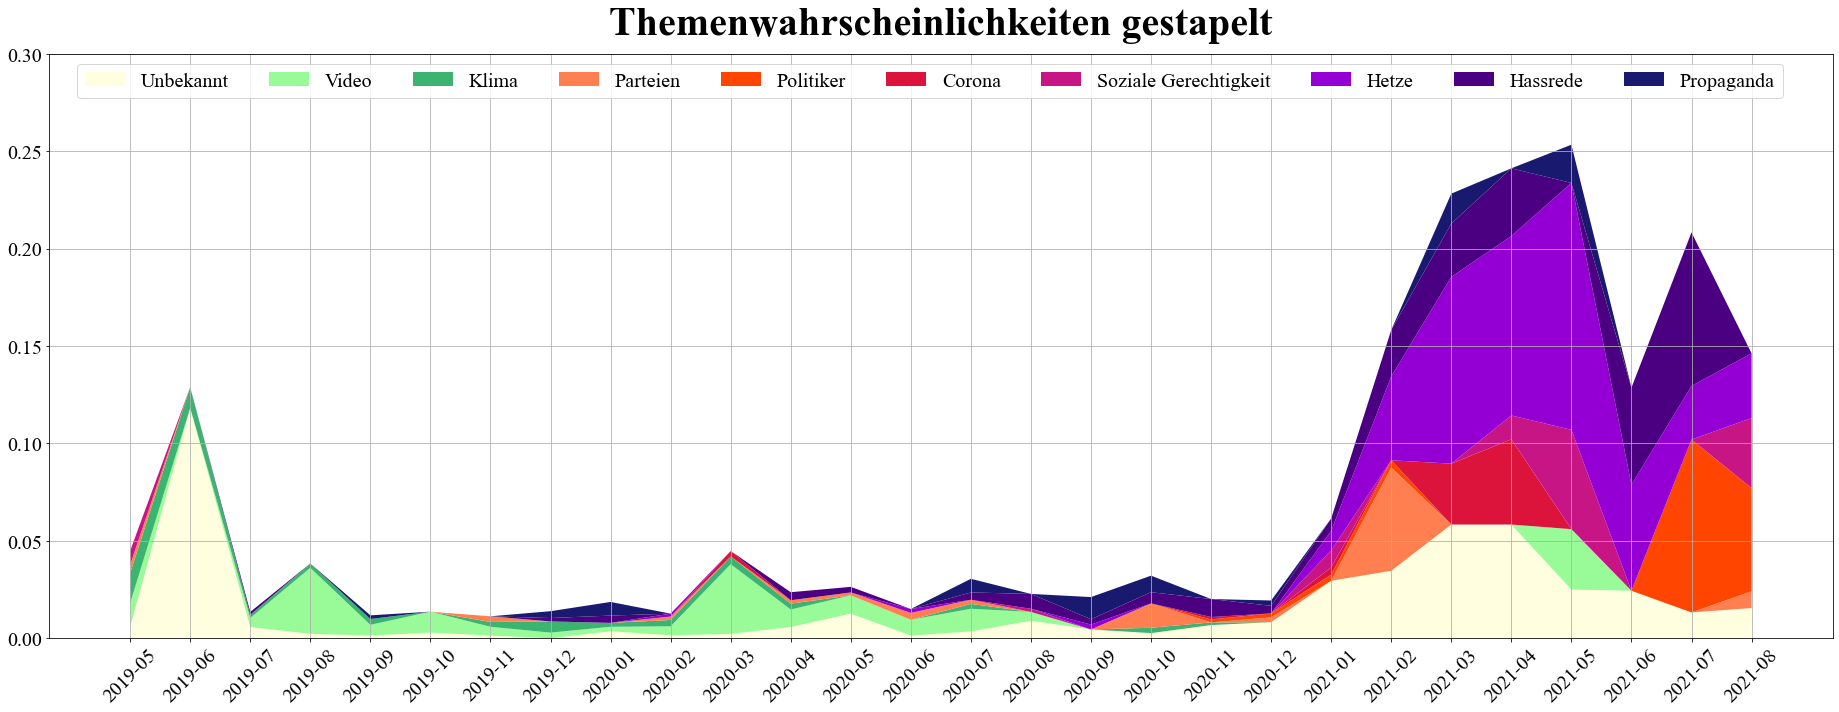

<IPython.core.display.Javascript object>

In [4]:
font1 = {"family": "Times New Roman", "weight": "normal", "size": 20}
colors = [
    "lightyellow",
    "palegreen",
    "mediumseagreen",
    "coral",
    "orangered",
    "crimson",
    "mediumvioletred",
    "darkviolet",
    "indigo",
    "midnightblue",
]
plt.rcParams["figure.figsize"] = [28, 10]
plt.rcParams["font.family"] = "Times New Roman"
plt.stackplot(
    months,
    weights_unbekannt,
    weights_video,
    weights_klima,
    weights_parteien,
    weights_politiker,
    weights_corona,
    weights_soziale_gerechtigkeit,
    weights_hetze,
    weights_hassrede,
    weights_propaganda,
    labels=topics,
    colors=colors,
)
plt.title(
    "Themenwahrscheinlichkeiten gestapelt",
    fontsize=40,
    weight="bold",
    pad=20,
)
plt.legend(prop=font1, loc="upper left", bbox_to_anchor=(0.01, 1), ncol=10)
plt.xticks(rotation=45, fontsize=20)
plt.yticks(fontsize=20)
plt.ylim(0, 0.3)
plt.grid(True)
plt.tight_layout()
plt.savefig("data/pdf/topic_modeling_probabilities.pdf", bbox_inches="tight")
plt.savefig("data/png/topic_modeling_probabilities.png", bbox_inches="tight")
plt.show()